# Data Science Masters :Assignment 20

# Problem:
Build the linear regression model using scikit learn in boston data to predict 'Price'
based on other dependent variable.

# Solution: 

In [142]:
# Import the required Libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

%matplotlib inline

# Load the Boston Housing DataSet from scikit-learn
from sklearn.datasets import load_boston
boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

# Load the data into pandas dataframe
bos = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# The target values is missing from the data. Create a new column of target values and add it to dataframe
bos['MEDV'] = boston_dataset.target
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [143]:
# Date Pre Processing
bos.isnull().sum()  # No missing values found in the dataset

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

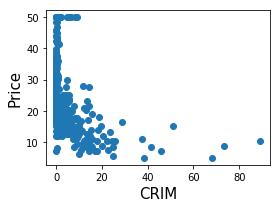

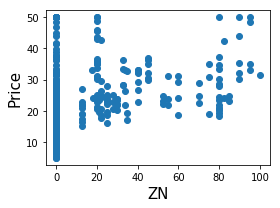

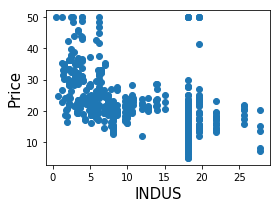

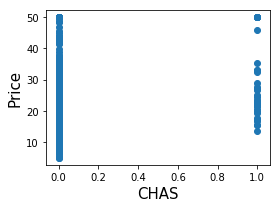

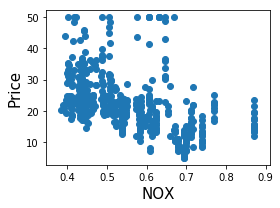

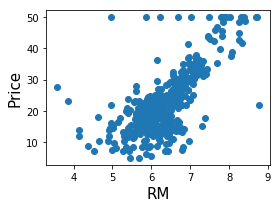

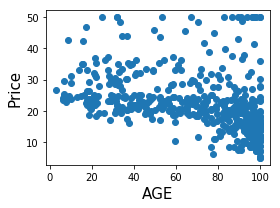

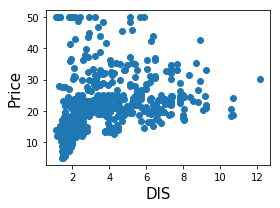

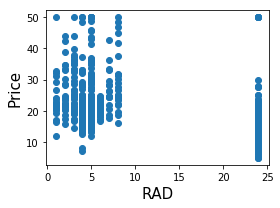

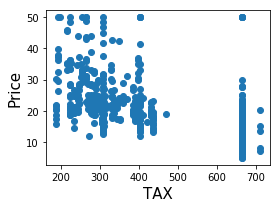

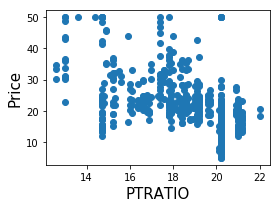

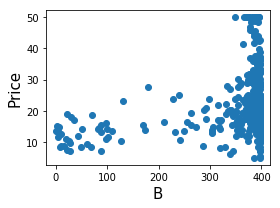

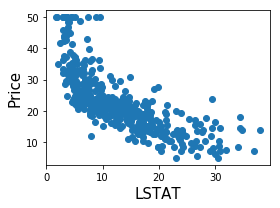

In [144]:
# Data Visualization thru Scatter plots to study the relationship b/w target and predictor variables
for index, feature_name in enumerate(boston_dataset.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(boston_dataset.data[:, index], boston_dataset.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

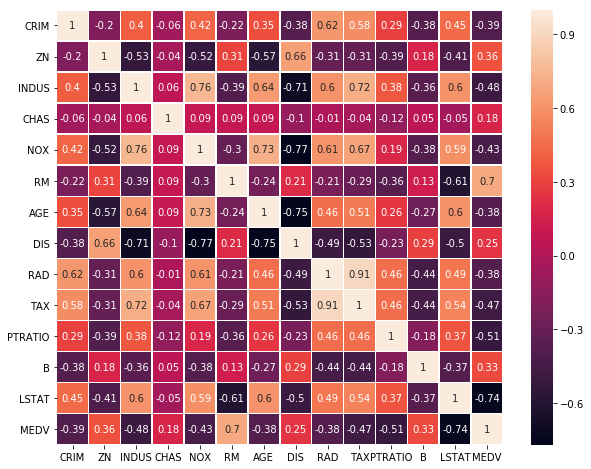

In [155]:
# Correlation matrix
# compute the pair wise correlation for all columns  
correlation_matrix = bos.corr().round(2)
# use the heatmap function from seaborn to plot the correlation matrix
fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

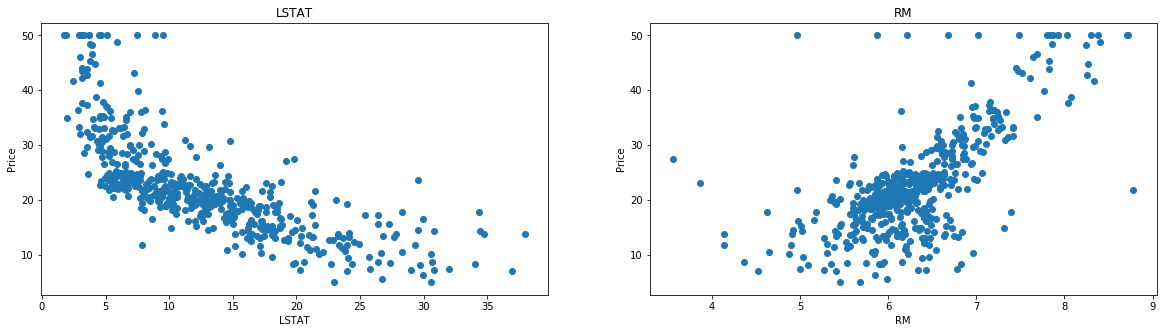

In [146]:
# Observations
# From the above coorelation plot we can see that MEDV is strongly correlated to LSTAT, RM

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bos['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')


In [147]:
# Prepare the data for training
X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
Y = pd.DataFrame(boston_dataset.target)
           
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=8)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [148]:
from sklearn import linear_model,metrics
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

print('Cooefficients :\n',lm.coef_)
# variance score: 1 means perfect prediction 
print('Variance score (R2 score): {}'.format(lm.score(X_test, y_test)))

Cooefficients :
 [[-1.10076971e-01  5.18341557e-02  1.47403635e-02  2.51379056e+00
  -1.49662742e+01  3.92758142e+00 -4.57455922e-03 -1.51880342e+00
   2.86533167e-01 -1.12074638e-02 -9.35054169e-01  8.42310515e-03
  -5.60927991e-01]]
Variance score (R2 score): 0.7081348459510759


Text(0,0.5,'Predictions')

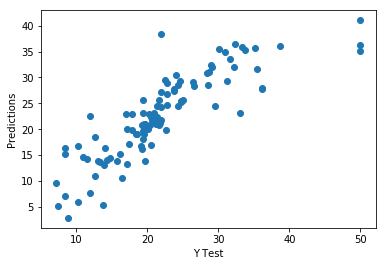

In [149]:
#Predicting Test Data
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

In [150]:
# Evaluating the Model
from sklearn import metrics
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MSE:  21.62548657267114
RMSE:  4.650321125757999


C:\Users\mkarthikeyan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


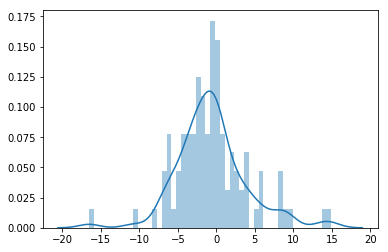

In [151]:
# Residual Histogram
sns.distplot((y_test-predictions),bins=50)

# Conclusion

In [152]:
# regression coefficients 
coeff_df = pd.DataFrame(lm.coef_, columns=X.columns)  
coeff_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.110077,0.051834,0.01474,2.513791,-14.966274,3.927581,-0.004575,-1.518803,0.286533,-0.011207,-0.935054,0.008423,-0.560928


In [156]:
# Comparison b/w predicted and actual y values in test data set...Looks acceptable results... 
df = pd.DataFrame(y_test[0]) 
df.columns = ['ActualY']
df['PredictedY']=predictions
df.head(100)

,ActualY,PredictedY
337,18.5,19.159865
30,12.7,10.954195
364,21.9,38.413819
240,22.0,27.179487
162,50.0,41.021555
181,36.2,27.726664
8,16.5,10.527713
274,32.4,36.395810
177,24.6,29.252249
370,50.0,35.072998
